<a href="https://colab.research.google.com/github/SergeyHSE/MarketingResearch.github.io/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('/content/MarketingData (1).csv')

In [55]:
data['Region'].value_counts()

западный кейп        432
стелленбош            51
вестерн кейп          46
свартланд             44
свортленд             37
паарл                 24
прибрежный регион     17
паарль                 4
долина робертсон       1
Name: Region, dtype: int64

In [56]:
data['Region'].replace({
    'западный кейп': 'Western Cape',
    'стелленбош': 'Stellenbosch',
    'вестерн кейп': 'Western Cape',
    'свартланд': 'Swartland',
    'свортленд': 'Swartland',
    'паарл': 'Paarl',
    'прибрежный регион': 'Coastal Region',
    'паарль': 'Paarl',
    'долина робертсон': 'Robertson Valley'
}, inplace=True)

In [20]:
!pip install squarify

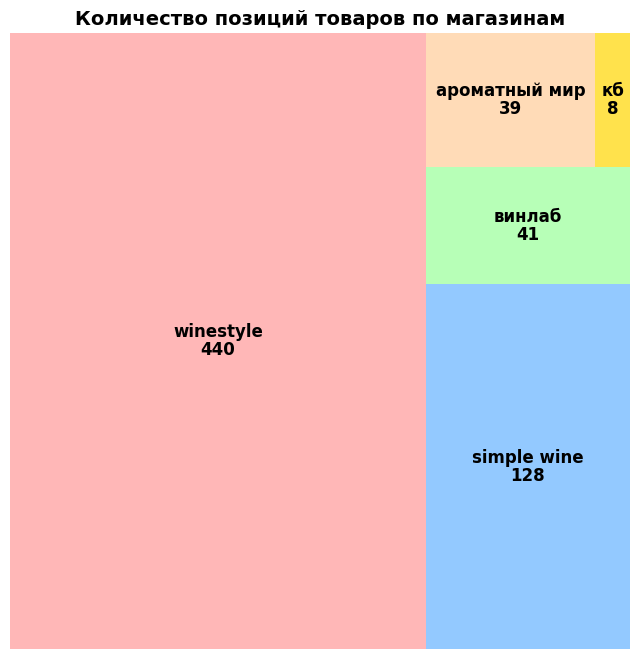

In [21]:
import squarify
store_counts = data['Store'].value_counts()

labels = store_counts.index
sizes = store_counts.values

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']
fig, ax = plt.subplots(figsize=(8, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, value=sizes, text_kwargs={'fontsize': 12, 'fontweight': 'bold'})
plt.axis("off")
plt.title('Количество позиций товаров по магазинам', fontsize=14, fontweight='bold')
plt.show()

In [22]:
data.head()

,Votes_Count,Price,Color,Region,Volume,Sugar,Alcohol,Grape_Varieties,Taste_Description,Brand,Rating,Segment,wine_stopper,Label,Shape,Year,Store
0,474.0,894.80,красное,Western Cape,0.75,сухое,13.0,пинотаж,"мощный, с фруктово–ягодной кислотностью и слад...",barista,3.5,low,1,1,1,2023,кб
1,281.0,499.99,белое,Western Cape,0.75,сухое,12.5,совиньон блан,"освежающий, минеральный, с приятной цитрусовой...",broadleaf,4.0,low,1,1,2,2023,кб
2,219.0,346.99,красное,Western Cape,0.75,полусухое,13.5,пинотаж,аромат раскрывается фруктами и ягодами: сливой...,kuumba,3.5,low,1,1,1,2023,кб
3,177.0,499.99,розовое,Western Cape,0.75,сухое,12.5,совиньон бланпино нуар,"освежающий, минеральный, с приятной цитрусовой...",broadleaf,4.0,low,1,1,2,2023,кб
4,172.0,346.99,белое,Western Cape,0.75,сухое,12.5,совиньон блан,"у вина свежий, элегантный вкус с приятными нот...",kuumba,3.5,low,1,1,1,2023,кб


In [57]:
import statsmodels.api as sm
import scipy.stats

df = data.drop('Taste_Description', axis=1)

In [39]:
df.describe().round(2)

,Votes_Count,Price,Volume,Alcohol,Rating,wine_stopper,Label,Shape,Year
count,656.00,656.00,656.00,656.00,656.00,656.00,656.00,656.00,656.00
mean,6.70,2848.78,0.75,13.13,1.97,1.52,1.41,1.55,2019.71
std,29.76,3289.16,0.05,1.14,2.79,0.56,0.49,0.50,18.87
min,0.00,169.99,0.30,8.00,0.00,1.00,1.00,1.00,1707.00
25%,0.00,994.50,0.75,12.50,0.00,1.00,1.00,1.00,2020.00
50%,0.00,1623.00,0.75,13.25,0.00,1.00,1.00,2.00,2022.00
75%,2.00,3366.75,0.75,14.00,4.50,2.00,2.00,2.00,2023.00
max,474.00,21543.00,1.50,17.50,10.00,3.00,2.00,3.00,2023.00


In [41]:
print(df.dtypes)

Votes_Count        float64
Price              float64
Color               object
Region              object
Volume             float64
Sugar               object
Alcohol            float64
Grape_Varieties     object
Brand               object
Rating             float64
Segment             object
wine_stopper         int64
Label                int64
Shape                int64
Year                 int64
Store               object
dtype: object


In [40]:
df.isnull().sum()

Votes_Count        0
Price              0
Color              0
Region             0
Volume             0
Sugar              0
Alcohol            0
Grape_Varieties    0
Brand              0
Rating             0
Segment            0
wine_stopper       0
Label              0
Shape              0
Year               0
Store              0
dtype: int64

In [58]:
df['Grape_Varieties'] = df['Grape_Varieties'].replace('сира', 'шираз')

In [59]:
df['Year'] = df['Year'].replace({1707: 2018, 1900: 2016})

In [60]:
# List of categorical columns
categorical_columns = ['Color', 'Region', 'Sugar', 'Grape_Varieties', 'Brand', 'Segment', 'Store']

# Loop through each column and encode numerically
for column in categorical_columns:
    df[column] = pd.Categorical(df[column]).codes + 1
df.head()

,Votes_Count,Price,Color,Region,Volume,Sugar,Alcohol,Grape_Varieties,Brand,Rating,Segment,wine_stopper,Label,Shape,Year,Store
0,474.0,894.80,3,6,0.75,8,13.0,27,15,3.5,2,1,1,1,2023,5
1,281.0,499.99,1,6,0.75,8,12.5,35,21,4.0,2,1,1,2,2023,5
2,219.0,346.99,3,6,0.75,6,13.5,27,75,3.5,2,1,1,1,2023,5
3,177.0,499.99,6,6,0.75,8,12.5,36,21,4.0,2,1,1,2,2023,5
4,172.0,346.99,1,6,0.75,8,12.5,35,75,3.5,2,1,1,1,2023,5


In [64]:
X = df.drop(['Price', 'Volume'], axis=1)

X = sm.add_constant(X)
y = df['Price']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     33.95
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           5.98e-68
Time:                        20:11:02   Log-Likelihood:                -6060.9
No. Observations:                 656   AIC:                         1.215e+04
Df Residuals:                     641   BIC:                         1.222e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.368e+05   6.12e+04     

In [65]:
from statsmodels.stats.diagnostic import linear_reset

results_reset = linear_reset(results, power=2, test_type='fitted', use_f=True)
print(results_reset.summary())

<F test: F=31.574267833646285, p=2.8660662916697294e-08, df_denom=640, df_num=1>


In [66]:
from scipy.stats import boxcox
y_transformed, lambda_value = boxcox(y)
model = sm.OLS(y_transformed, X)
results = model.fit()

# Print Box-Cox transformation details
print("Lambda value:", lambda_value)
print(results.summary())

Lambda value: -0.23024569893600938
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     105.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          2.32e-155
Time:                        20:17:14   Log-Likelihood:                 716.08
No. Observations:                 656   AIC:                            -1402.
Df Residuals:                     641   BIC:                            -1335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const  

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif_df

,variable,VIF
0,const,386912.726059
1,Votes_Count,1.453942
2,Color,1.200330
3,Region,1.134505
4,Sugar,2.985772
5,Alcohol,1.258605
6,Grape_Varieties,1.264945
7,Brand,1.083717
8,Rating,1.248258
9,Segment,6.587733


In [68]:
vif_df[vif_df['VIF'] > 10]

,variable,VIF
0,const,386912.726059


In [69]:
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(results.resid, X)

if p_value < 0.005:
  print(f'Rejected null hypothesis and concluded that there is hetoroscedastisity: {p_value:.3f}')
else:
  print(f'Accept null hypothesis and concluded that there is no hetoroscedastisity: {p_value:.3f}')

Rejected null hypothesis and concluded that there is hetoroscedastisity: 0.000


In [ ]:
# WLS
model_WLS = sm.OLS(y_transformed, X)
results_C = model_WLS.fit()
weights = 1.0 / np.sqrt(np.abs(results_C.resid))
model_WLS = sm.WLS(y_no_ghost, X_no_ghost_C, weights=weights)
results_WLS = model_WLS.fit()

print(results_WLS.summary())